<a href="https://colab.research.google.com/github/anster01/MFTech/blob/main/STAI%20detector/Analysis_and_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **RR Analysis**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
! unzip '/content/drive/MyDrive/MMASH_RR.zip'

Archive:  /content/drive/MyDrive/MMASH_RR.zip
  inflating: MMASH_RR/1.csv          
  inflating: MMASH_RR/10.csv         
  inflating: MMASH_RR/11.csv         
  inflating: MMASH_RR/12.csv         
  inflating: MMASH_RR/13.csv         
  inflating: MMASH_RR/14.csv         
  inflating: MMASH_RR/15.csv         
  inflating: MMASH_RR/16.csv         
  inflating: MMASH_RR/17.csv         
  inflating: MMASH_RR/18.csv         
  inflating: MMASH_RR/19.csv         
  inflating: MMASH_RR/2.csv          
  inflating: MMASH_RR/20.csv         
  inflating: MMASH_RR/21.csv         
  inflating: MMASH_RR/22.csv         
  inflating: MMASH_RR/3.csv          
  inflating: MMASH_RR/4.csv          
  inflating: MMASH_RR/5.csv          
  inflating: MMASH_RR/6.csv          
  inflating: MMASH_RR/7.csv          
  inflating: MMASH_RR/8.csv          
  inflating: MMASH_RR/9.csv          


**Read csv**

In [4]:
import glob, os

# get data file names

local_path = r'/content/MMASH_RR'

filenames = glob.glob(local_path + "/*.csv")

def sortKeyFunc(s):
    return int(os.path.basename(s)[:-4])

filenames.sort(key=sortKeyFunc)

display(filenames)

dfs = [pd.read_csv(filename) for filename in filenames]

display(dfs)


['/content/MMASH_RR/1.csv',
 '/content/MMASH_RR/2.csv',
 '/content/MMASH_RR/3.csv',
 '/content/MMASH_RR/4.csv',
 '/content/MMASH_RR/5.csv',
 '/content/MMASH_RR/6.csv',
 '/content/MMASH_RR/7.csv',
 '/content/MMASH_RR/8.csv',
 '/content/MMASH_RR/9.csv',
 '/content/MMASH_RR/10.csv',
 '/content/MMASH_RR/11.csv',
 '/content/MMASH_RR/12.csv',
 '/content/MMASH_RR/13.csv',
 '/content/MMASH_RR/14.csv',
 '/content/MMASH_RR/15.csv',
 '/content/MMASH_RR/16.csv',
 '/content/MMASH_RR/17.csv',
 '/content/MMASH_RR/18.csv',
 '/content/MMASH_RR/19.csv',
 '/content/MMASH_RR/20.csv',
 '/content/MMASH_RR/21.csv',
 '/content/MMASH_RR/22.csv']

[       Unnamed: 0  ibi_s  day      time
 0               1  0.258    1  10:10:17
 1               2  0.319    1  10:10:18
 2               3  0.266    1  10:10:18
 3               4  0.401    1  10:10:18
 4               5  1.089    1  10:10:19
 ...           ...    ...  ...       ...
 91853       91854  0.470    2  09:45:25
 91854       91855  0.465    2  09:45:25
 91855       91856  0.463    2  09:45:25
 91856       91857  0.457    2  09:45:26
 91857       91858  0.279    2  09:45:26
 
 [91858 rows x 4 columns],        Unnamed: 0  ibi_s  day      time
 0               1  6.512    1  10:03:18
 1               2  0.453    1  10:03:19
 2               3  0.374    1  10:03:19
 3               4  0.478    1  10:03:19
 4               5  0.706    1  10:03:20
 ...           ...    ...  ...       ...
 71641       71642  0.666    2  09:45:05
 71642       71643  0.662    2  09:45:07
 71643       71644  0.342    2  09:45:07
 71644       71645  0.327    2  09:45:07
 71645       71646  0.269    

# **HRV Analysis**

In [5]:
pip install hrv-analysis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Removing outliers from the RR-intervals (to NN intervals)**

In [6]:
from hrvanalysis import remove_outliers, remove_ectopic_beats, interpolate_nan_values, plot_poincare

new_dfs = []

for i in range(22):
  
  rr_intervals_list = dfs[i]['ibi_s'].to_list()

  # This remove outliers from signal
  rr_intervals_without_outliers = remove_outliers(rr_intervals=rr_intervals_list, low_rri=0.2, high_rri=2)
  # This replace outliers nan values with linear interpolation
  interpolated_rr_intervals = interpolate_nan_values(rr_intervals=rr_intervals_without_outliers,
                                                    interpolation_method="linear")

  # This remove ectopic beats from signal
  nn_intervals_list = remove_ectopic_beats(rr_intervals=interpolated_rr_intervals, method="malik")
  # This replace ectopic beats nan values with linear interpolation
  interpolated_nn_intervals = interpolate_nan_values(rr_intervals=nn_intervals_list)

  new_dfs.append(interpolated_nn_intervals)


print(new_dfs[1])

9 outlier(s) have been deleted.
The outlier(s) value(s) are : [27.759, 3.174, 2.971, 5.567, 3.907, 2.004, 2.153, 3.999, 4.779]
2397 ectopic beat(s) have been deleted with malik rule.
403 outlier(s) have been deleted.
The outlier(s) value(s) are : [6.5120000000000005, 14.055, 7.777, 2.5540000000000003, 5.809, 3.674, 2.374, 2.765, 2.514, 2.426, 3.551, 8.331, 3.173, 7.007, 2.4, 4.6690000000000005, 2.956, 2.756, 2.851, 4.002, 6.747, 4.408, 6.48, 3.027, 3.017, 2.624, 8.162, 2.508, 3.99, 7.867, 5.937, 8.141, 3.058, 2.517, 2.908, 2.452, 6.856, 2.446, 3.32, 5.364, 2.101, 2.521, 8.467, 2.431, 5.326, 2.207, 2.297, 7.272, 2.104, 2.244, 2.249, 4.437, 2.855, 2.309, 4.987, 2.31, 2.6, 5.004, 9.1, 3.287, 4.02, 4.476, 4.134, 5.468, 2.222, 4.157, 2.558, 2.515, 3.836, 2.922, 3.901, 2.104, 4.684, 4.182, 4.983, 2.531, 3.209, 2.618, 2.688, 3.688, 2.928, 3.565, 2.359, 2.575, 4.279, 2.185, 2.375, 3.257, 3.063, 5.813, 5.12, 2.167, 6.229, 6.086, 4.581, 4.283, 5.435, 2.126, 3.787, 2.446, 6.25, 3.267, 3.123, 5.62

**HRV spectral analysis**

person  1


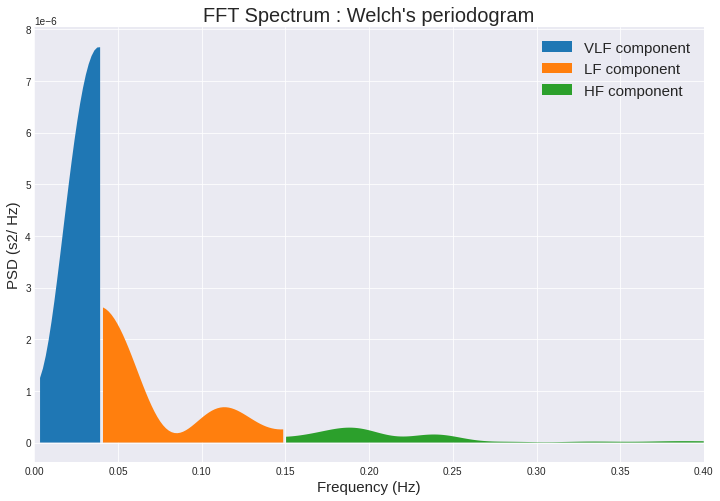

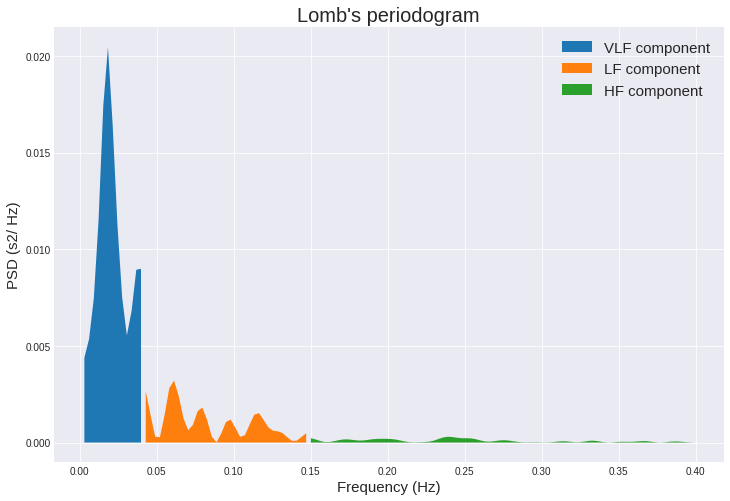

person  2


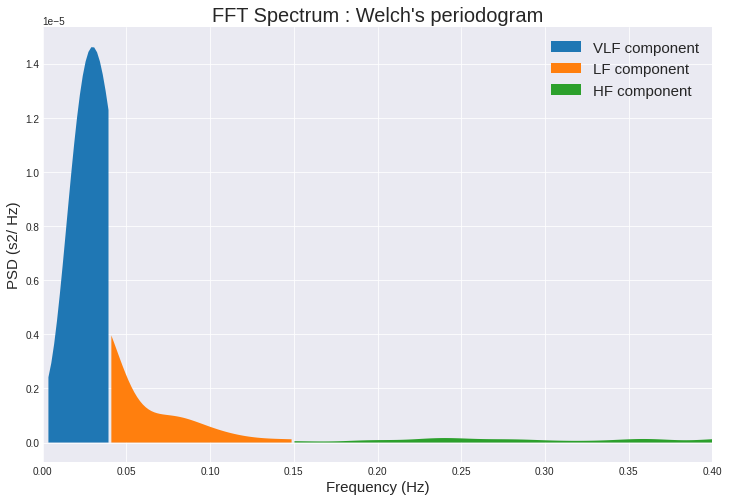

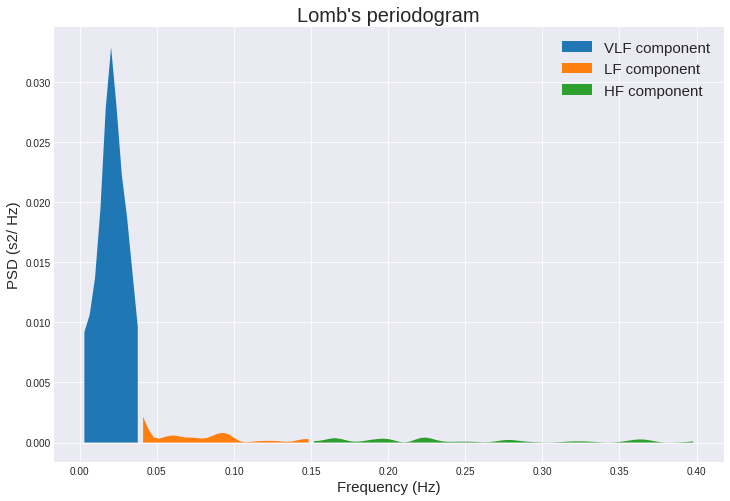

person  3


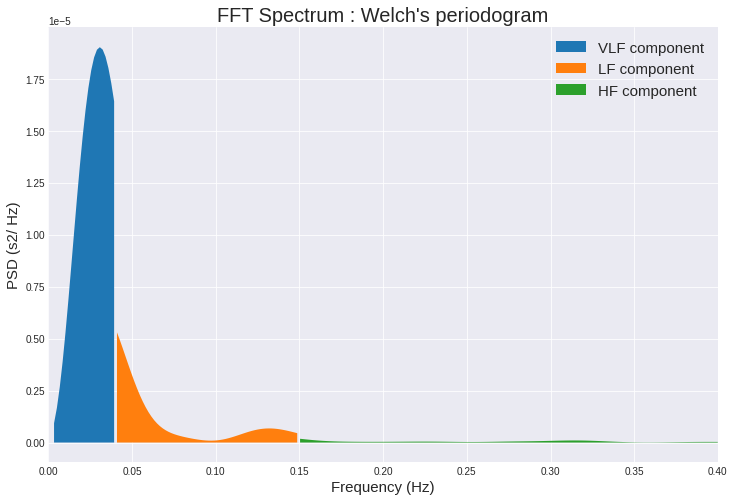

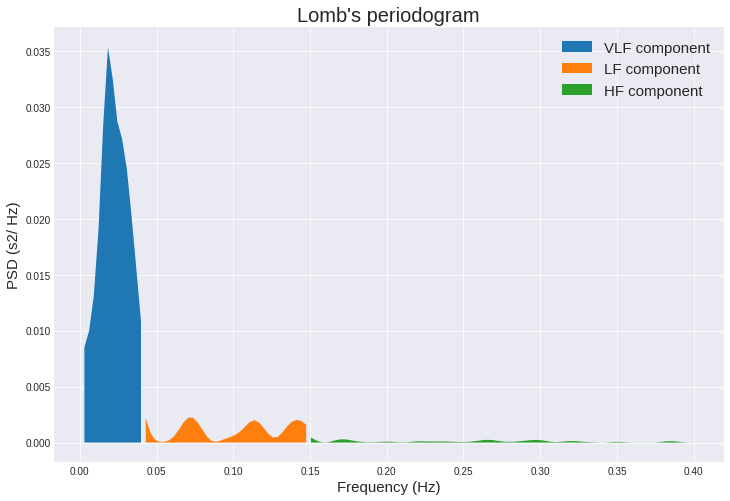

person  4


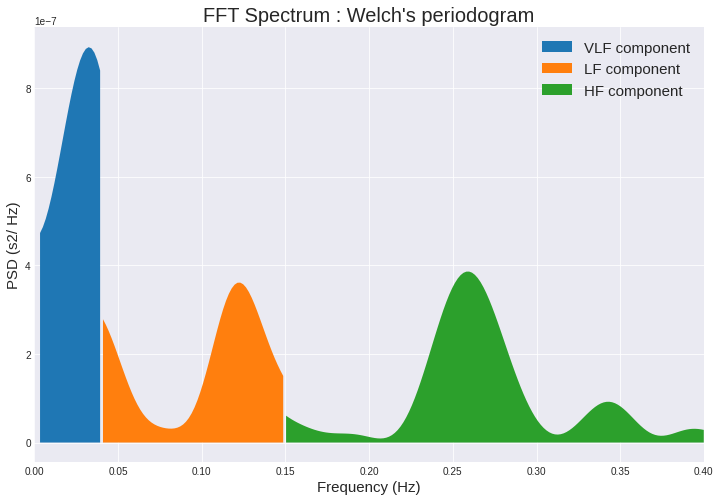

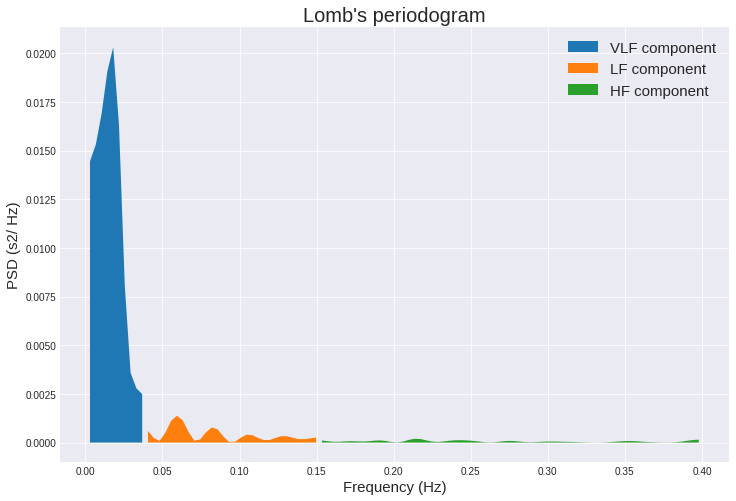

person  5


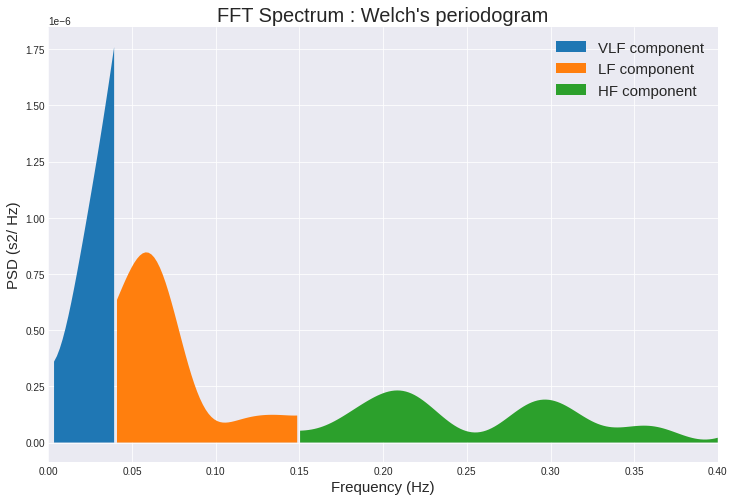

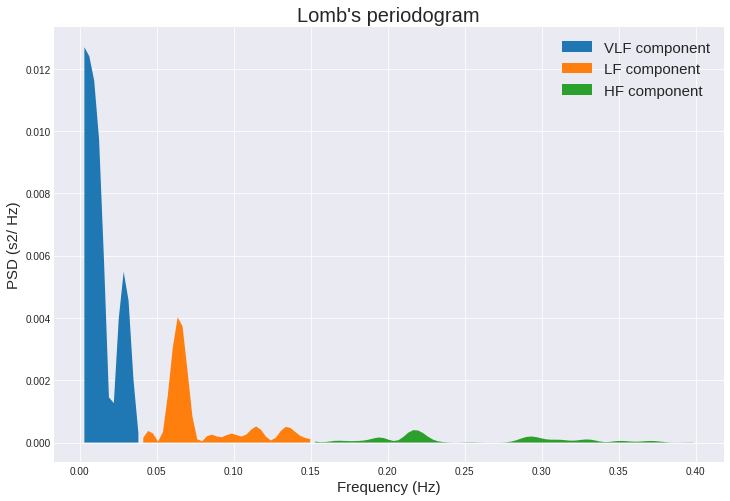

person  6


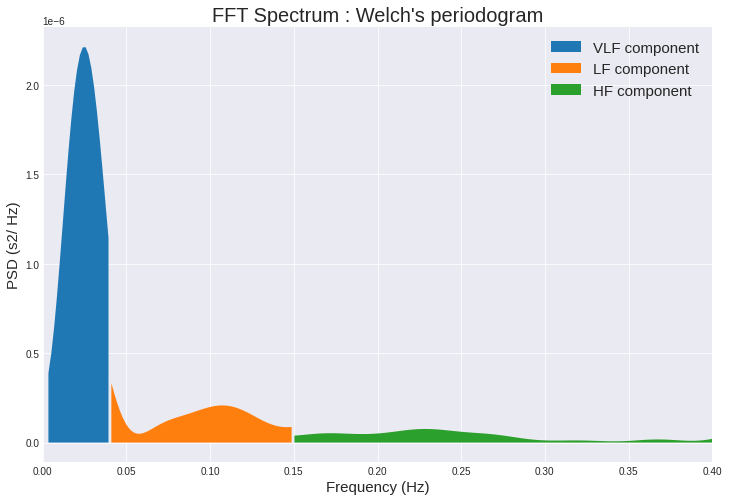

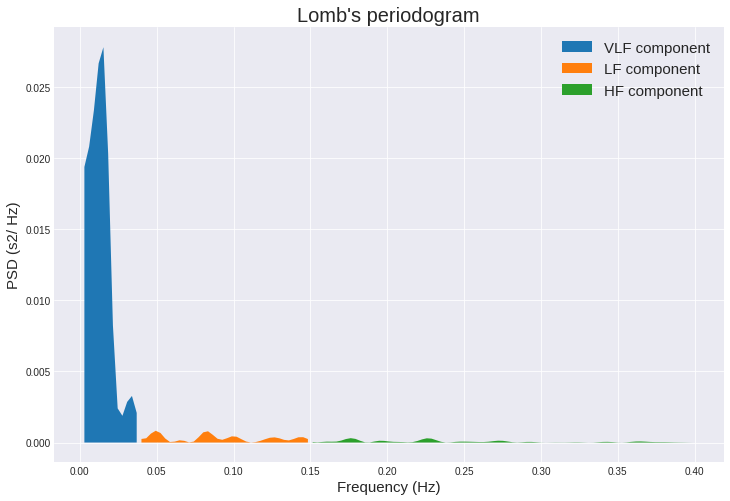

person  7


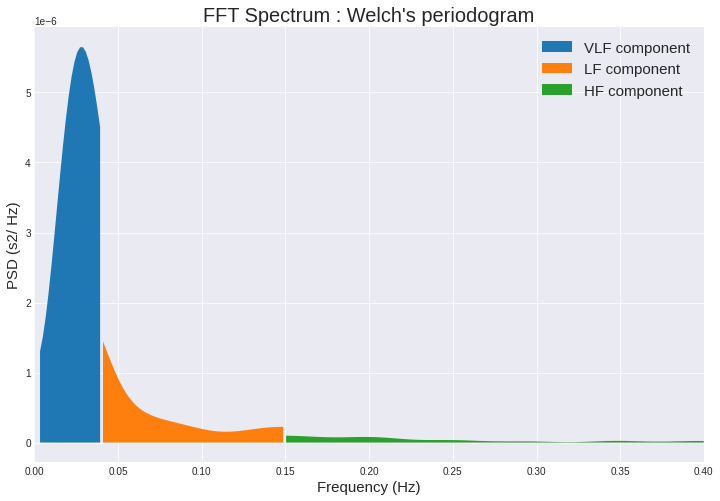

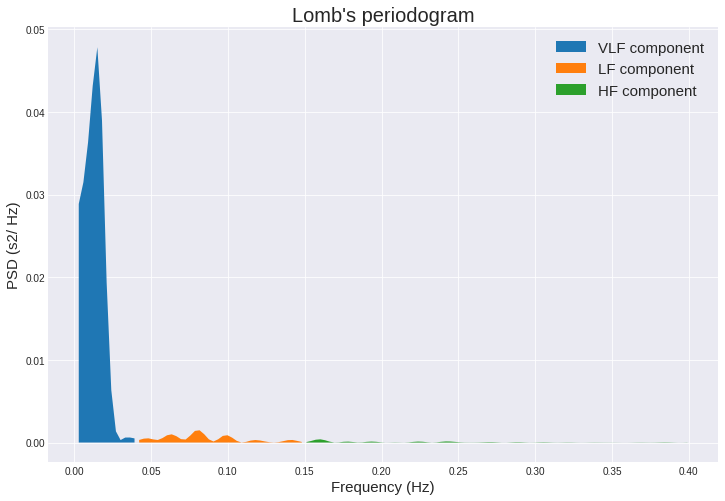

person  8


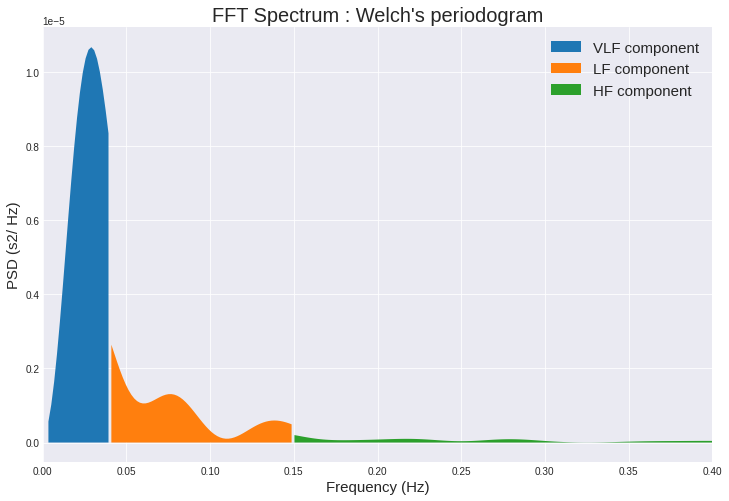

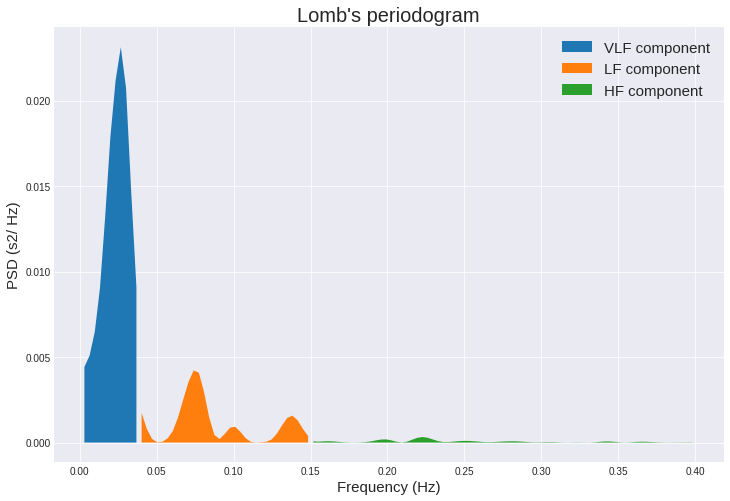

person  9


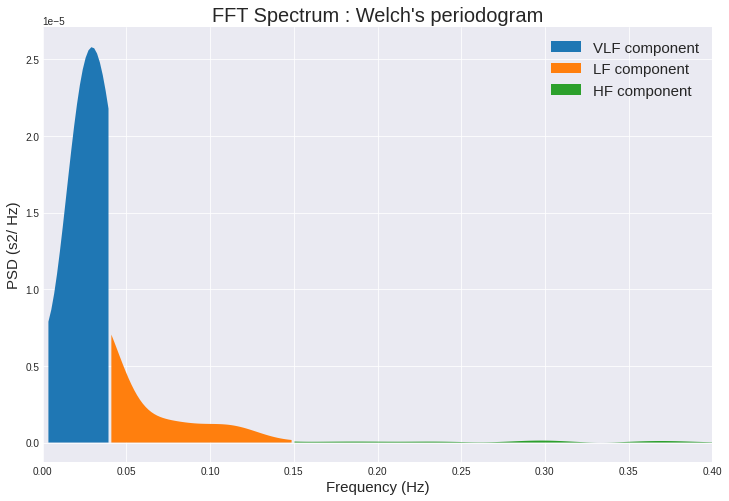

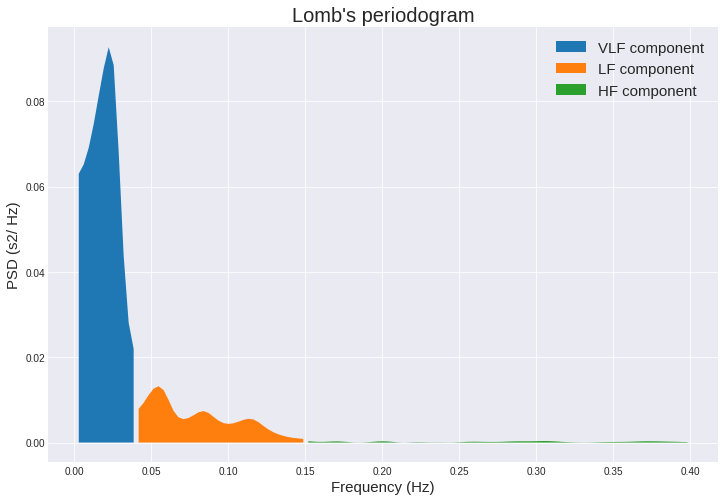

person  10


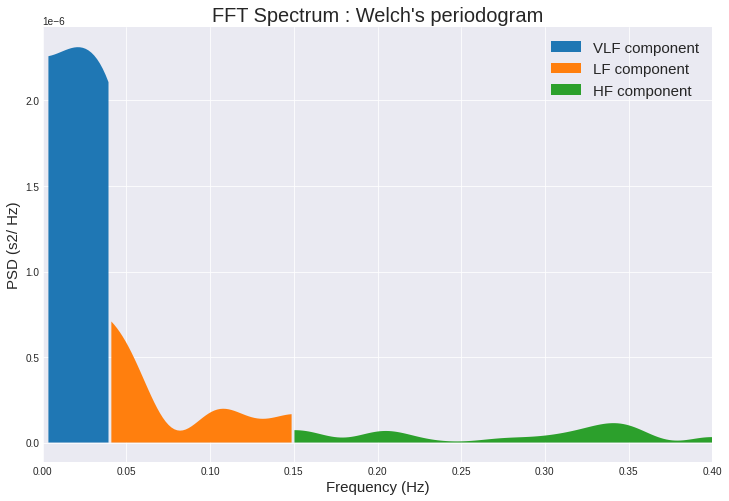

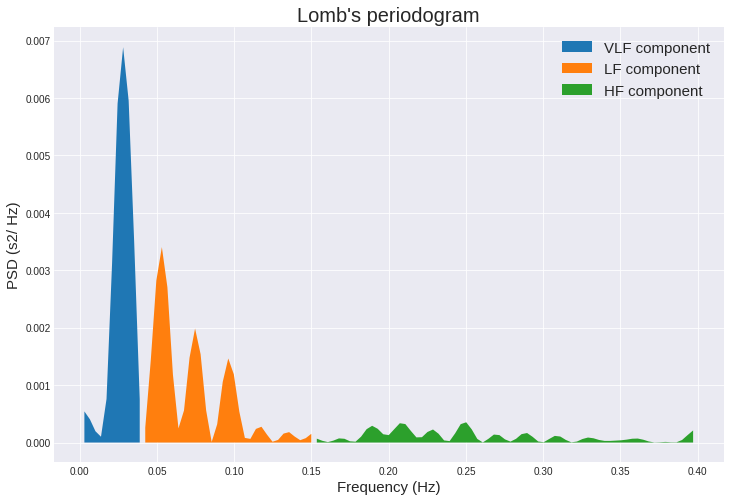

person  11


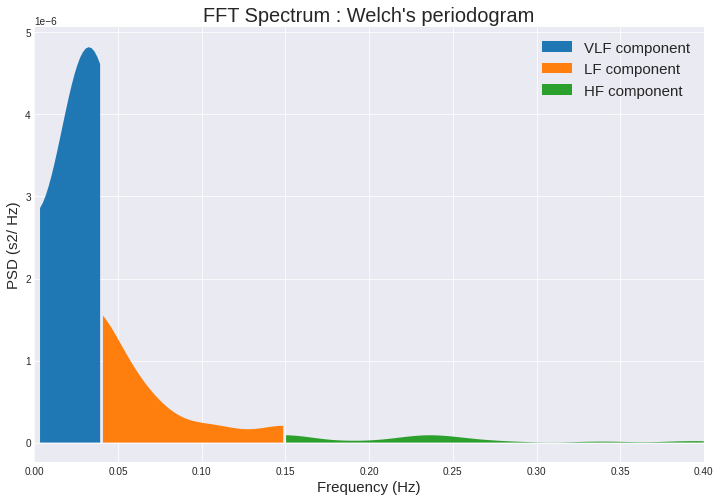

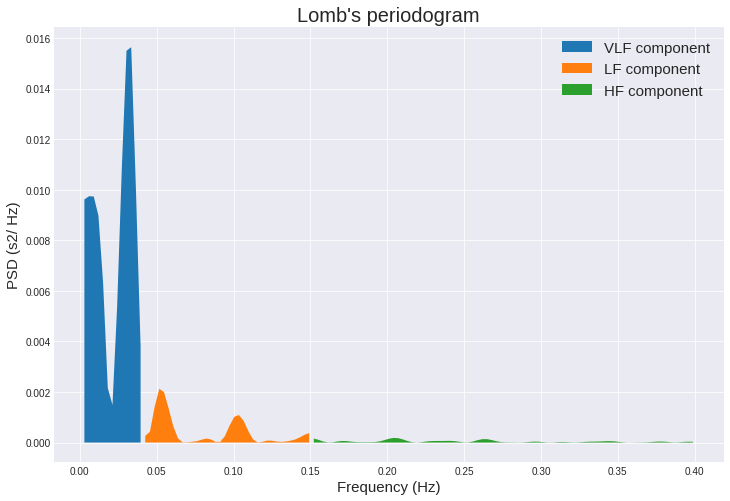

person  12


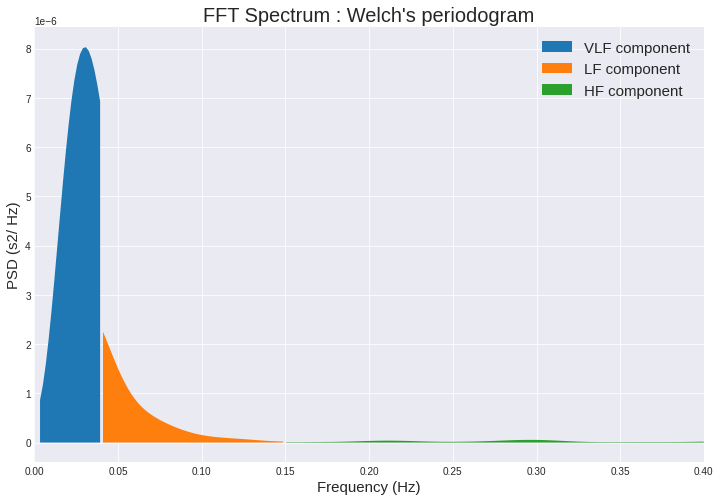

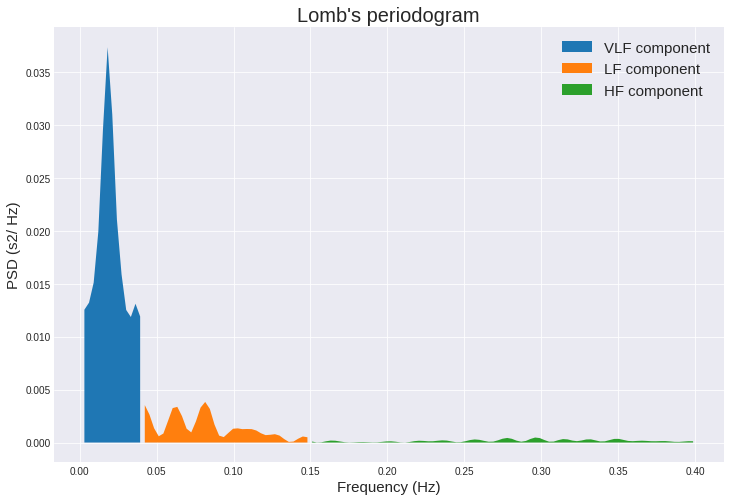

person  13


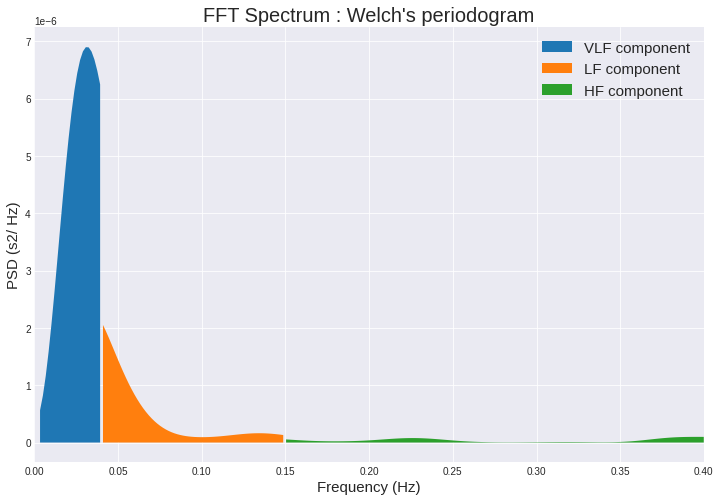

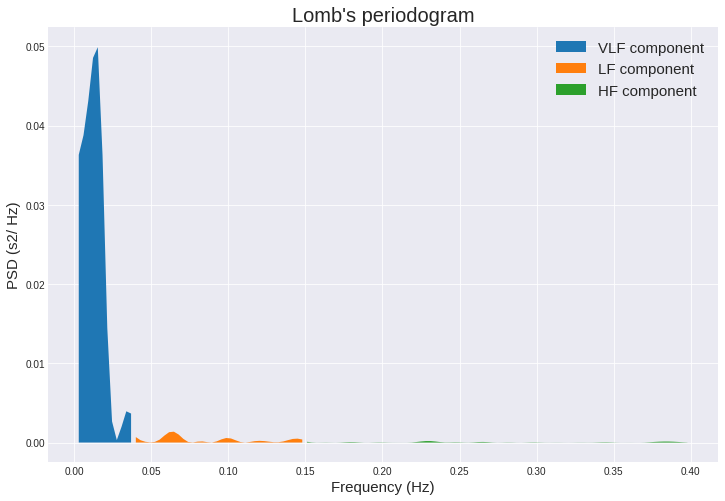

person  14


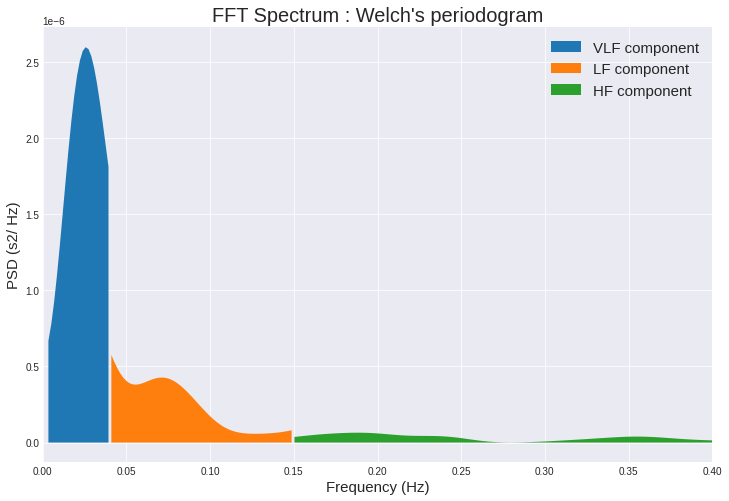

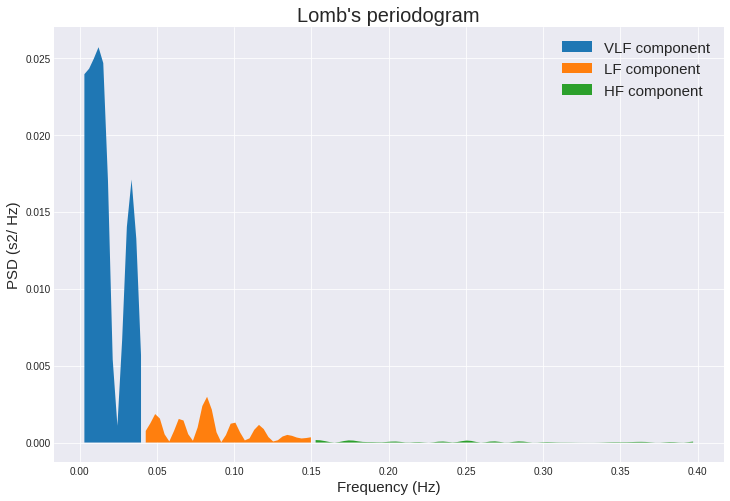

person  15


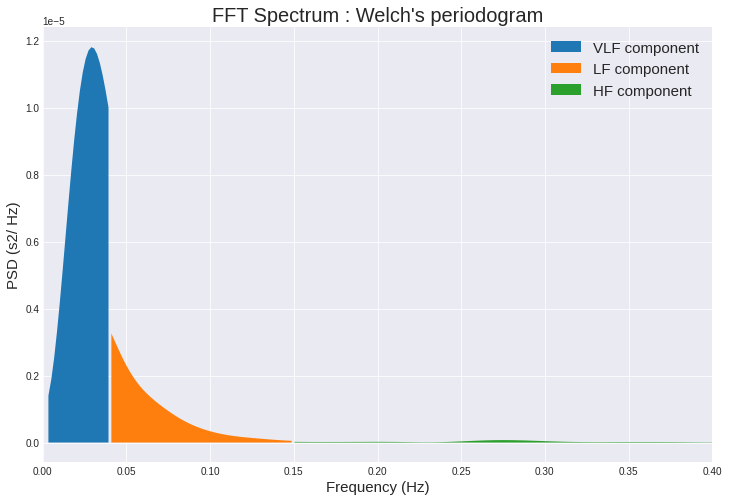

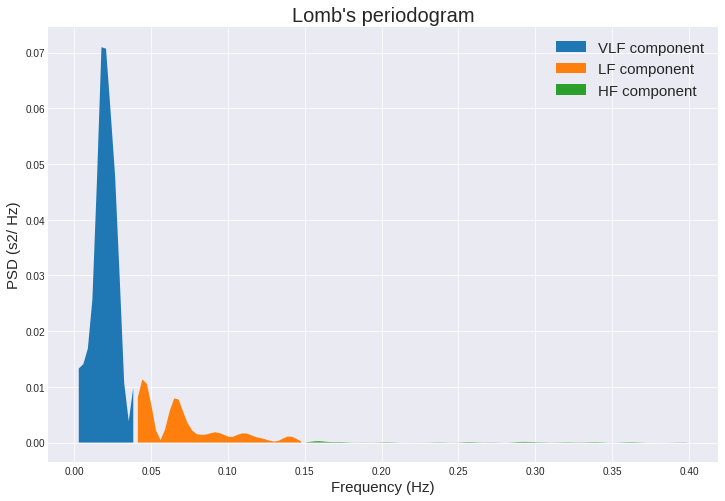

person  16


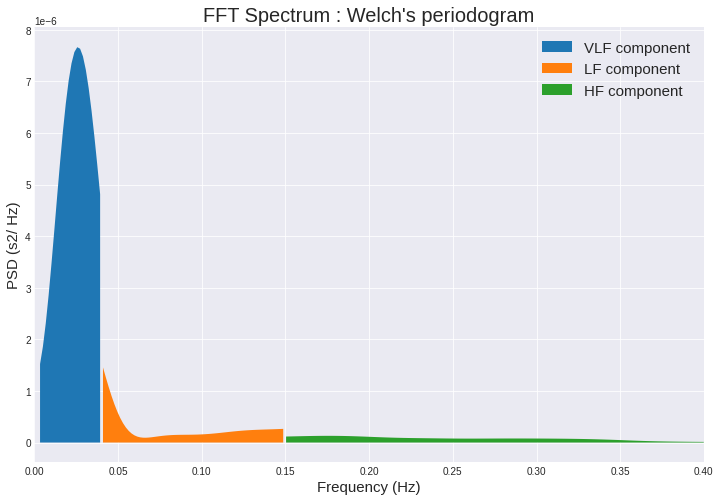

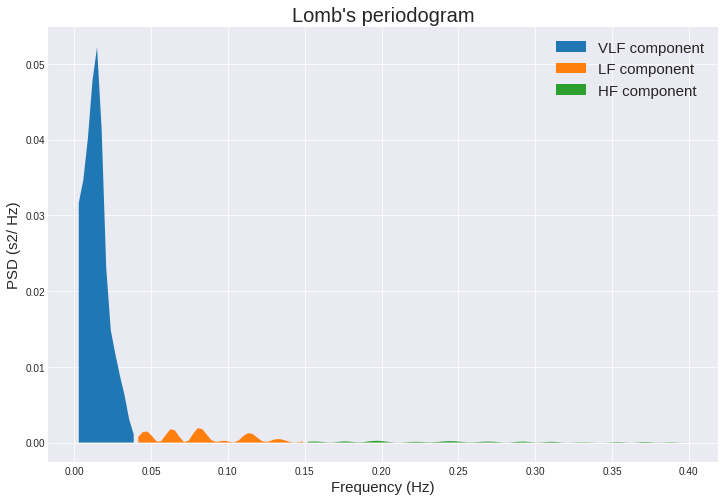

person  17


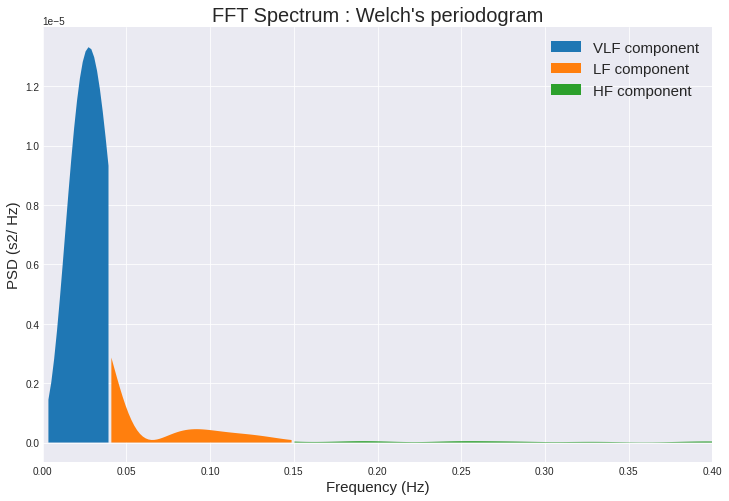

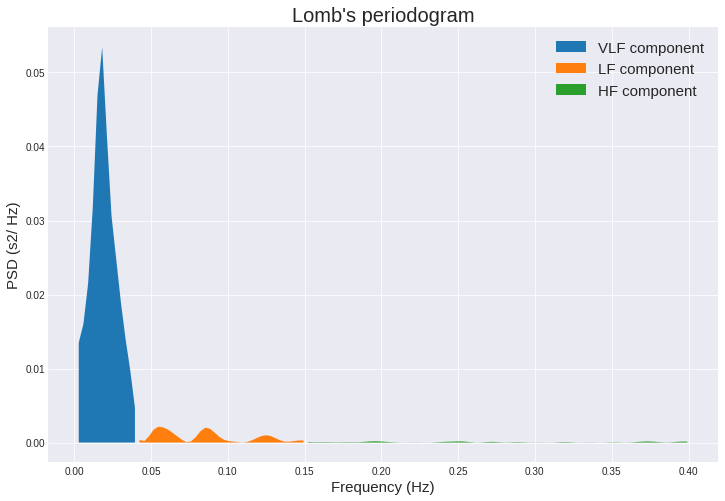

person  18


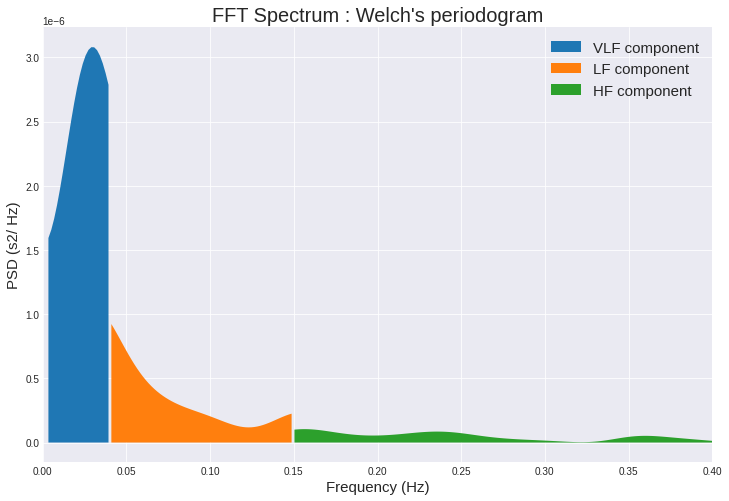

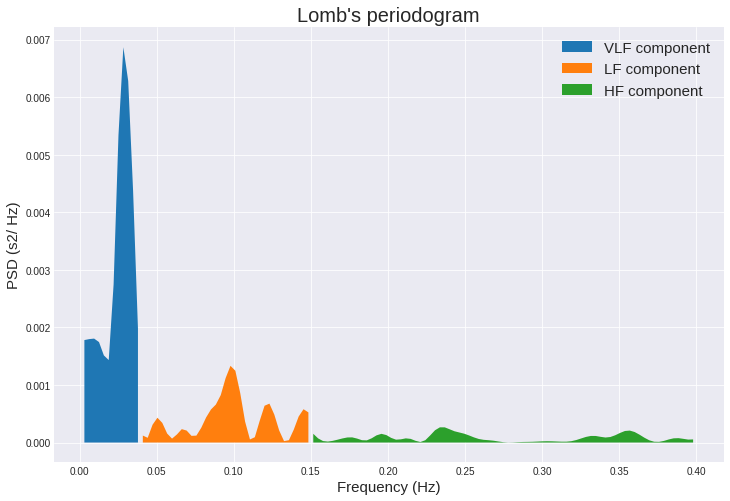

person  19


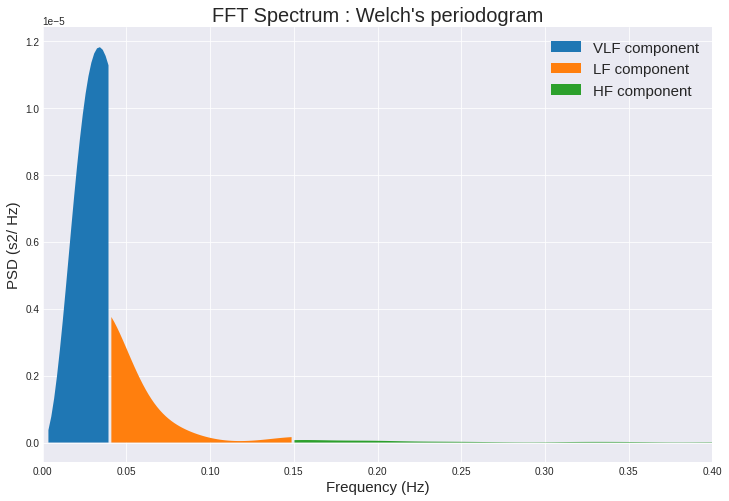

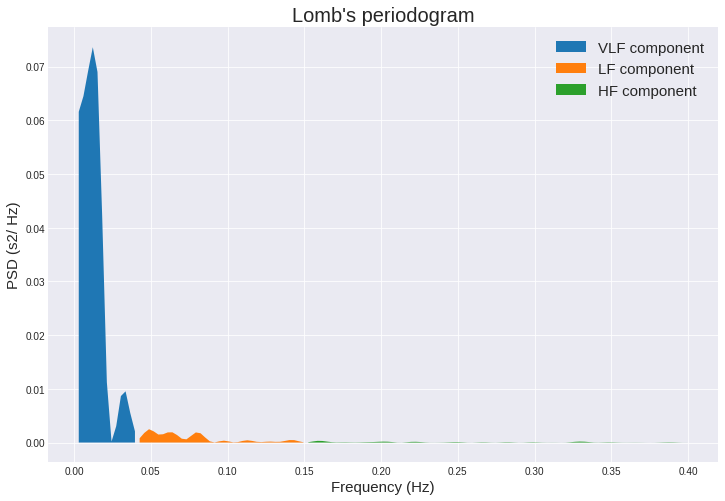

person  20


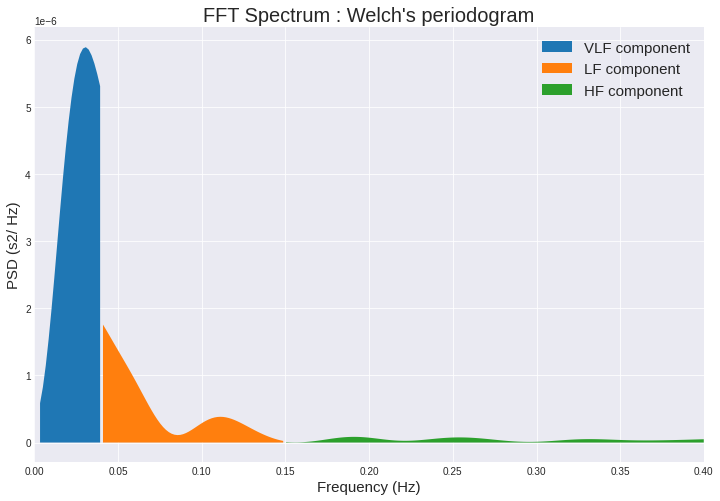

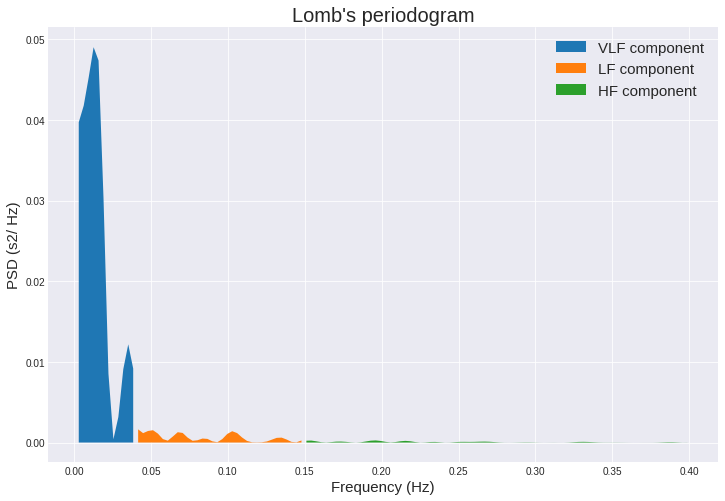

person  21


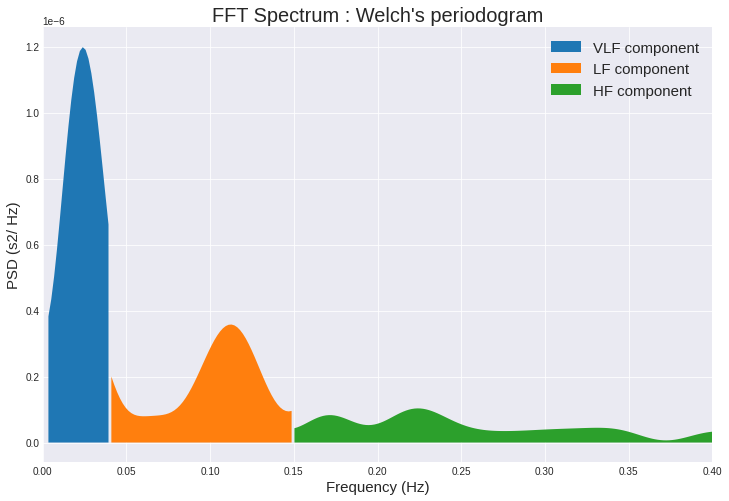

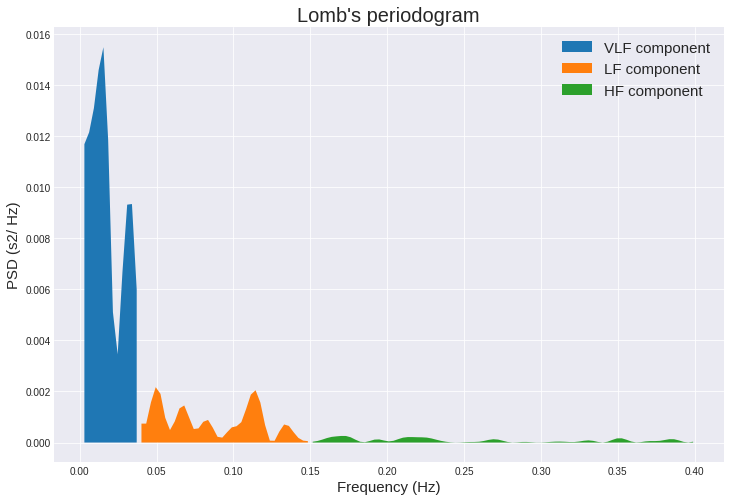

person  22


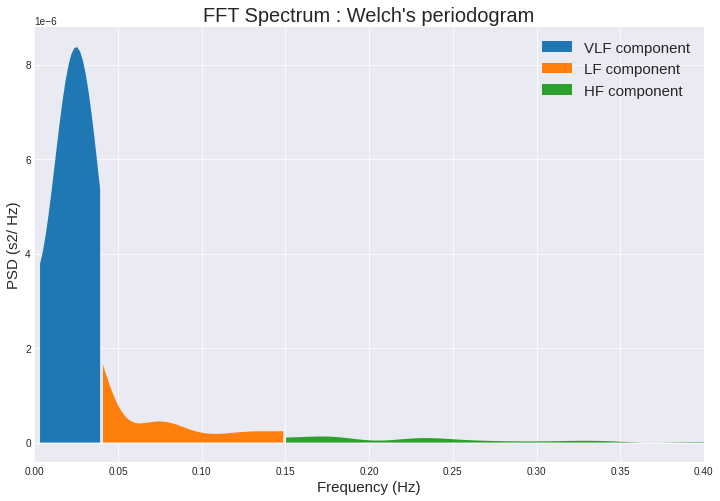

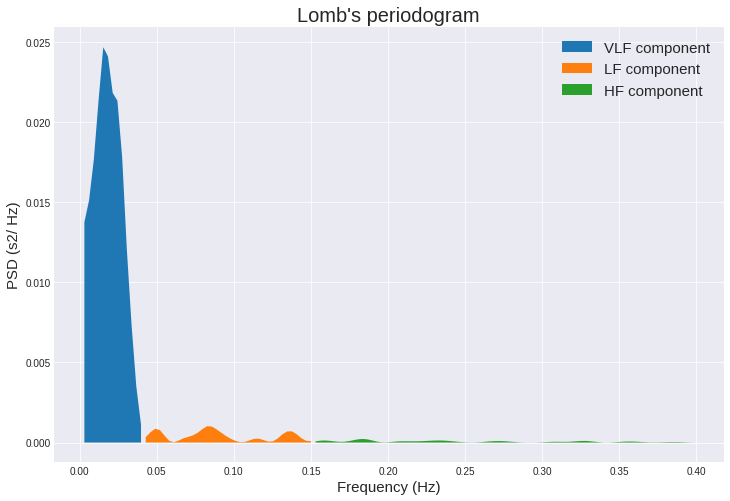

In [7]:
from hrvanalysis import plot_psd


# test_list = [1, 4, 6, 7, 8, 10, 12, 15, 17, 18, 19]



for i in range(22):  
  new_dfs[i].pop(0)
  new_dfs[i].pop(0)

  print("person ",i+1)
  plot_psd(new_dfs[i], method="welch")
  plot_psd(new_dfs[i], method="lomb")

**HRV linear analysis**

Finding meanNN :

In [8]:
#finding meanNN

meanNN = []

for i in range(22):  
  meanNNval = np.mean(new_dfs[i]) * 1000
  meanNN.append(meanNNval)

print(meanNN)

[710.43535261714, 806.1681165438372, 774.7467376503142, 848.5604611145685, 806.4002587426073, 700.0255968815982, 792.1357044488354, 827.1760273302003, 820.4324633212844, 819.673536075714, 855.0804156195884, 815.1538504161946, 797.8739965955003, 833.7984272524673, 661.2480522060882, 859.0523595424177, 705.8001640684677, 851.8146418284115, 817.1578480002993, 860.567247635271, 791.5442699724517, 920.9753978770492]


Finding SDNN:

In [9]:
#finding SDNN
#Healthy people have SDNN above 100ms

SDNN = []

for i in range(22):  
  SDNNval = np.std(new_dfs[i]) * 1000
  SDNN.append(SDNNval)

print(SDNN)

[155.83248640227555, 187.75218833912825, 183.3805886284797, 181.43574086073275, 138.98990994900313, 137.5744875717263, 164.67364208357165, 170.04553693499705, 243.282759480011, 145.29196557879268, 143.3742738078158, 175.01976756537903, 159.61791877905532, 149.71773270466105, 200.34652670754477, 199.98012704229492, 185.89061560432575, 152.81226162500965, 193.82310433596965, 179.07879748720137, 148.05885754779237, 169.527770968526]


Finding RMSSD:

In [10]:
#find RMSSD 

rmssd = []
numer = 0

for i in range(22):
  rowsize = len(new_dfs[i]) - 1
  for j in range(rowsize):
    numer_i = np.square(new_dfs[i][j]*1000 - new_dfs[i][j+1]*1000)
    numer = numer + numer_i
  rmssd_val = np.sqrt(numer/rowsize)
  rmssd.append(rmssd_val)

print(rmssd)

[51.2961741369112, 81.37268664691987, 92.2891991073887, 132.59964782716787, 126.96616312928258, 126.09479507956137, 135.89598442347926, 157.7701449993342, 159.70320329319492, 179.0943219527208, 174.84090152936756, 173.0881173881697, 176.23642707873344, 181.8522845103817, 167.58958174469265, 199.18855192521212, 189.44797167963304, 221.9161004804698, 217.96712508012976, 233.91214350530745, 222.60575192477336, 243.3885402979182]


Finding SDSD:

In [11]:
#find SDSD

sdsd = []
numer = []

for i in range(22):
  rowsize = len(new_dfs[i]) - 1
  for j in range(rowsize):
    numer_i = np.abs(new_dfs[i][j]*1000 - new_dfs[i][j+1]*1000)
    numer.append(numer_i)
  sdsd_val = np.std(numer)
  sdsd.append(sdsd_val)

print(sdsd)

[39.74127816777717, 43.93884312901597, 43.46151822579876, 49.38207499716985, 46.603025937442055, 45.05268922460413, 42.759878669208376, 43.42651873443016, 42.322276979318474, 42.850705410148194, 42.039825476532776, 40.826924643015325, 39.78147641626662, 38.81163868975534, 39.118789482302994, 39.495692684132194, 39.38992315347349, 40.164061939302954, 39.91971540992169, 39.70383735411832, 39.10731064683409, 38.89269678264171]


Finding pnn50:

In [12]:
#find pnn50

pnn50 = []

for i in range(22):
  above50 = 0
  rowsize = len(new_dfs[i])
  for j in range(rowsize - 1):
    numer_i = np.abs(new_dfs[i][j]*1000 - new_dfs[i][j+1]*1000)
    if numer_i > 50:
      above50 = above50 + 1
    else:
      continue
  

  print("above 50: ",above50)
  print("rowsize: ", rowsize)
  pnn50_val = 100 * above50 / rowsize
  pnn50.append(pnn50_val)


print(pnn50)

above 50:  19268
rowsize:  91856
above 50:  9649
rowsize:  71644
above 50:  17942
rowsize:  83963
above 50:  12727
rowsize:  62667
above 50:  13249
rowsize:  77780
above 50:  17081
rowsize:  92355
above 50:  5445
rowsize:  83505
above 50:  10773
rowsize:  71496
above 50:  14975
rowsize:  75248
above 50:  19674
rowsize:  68116
above 50:  16279
rowsize:  76801
above 50:  8002
rowsize:  81212
above 50:  8802
rowsize:  81265
above 50:  7198
rowsize:  78525
above 50:  20434
rowsize:  102338
above 50:  12439
rowsize:  78179
above 50:  21217
rowsize:  92949
above 50:  19675
rowsize:  74294
above 50:  12484
rowsize:  80237
above 50:  10509
rowsize:  72207
above 50:  9679
rowsize:  81675
above 50:  14840
rowsize:  70939
[20.976310747256576, 13.467980570599073, 21.368936317187334, 20.308934526944007, 17.033941887374645, 18.49493801093606, 6.520567630680797, 15.06797583081571, 19.900861152455878, 28.88308180163251, 21.196338589341284, 9.853223661527853, 10.831231157324801, 9.166507481693728, 19.9

Finding pnn20:

In [13]:
#find pnn20

pnn20 = []

for i in range(22):
  above20 = 0
  rowsize = len(new_dfs[i])
  for j in range(rowsize - 1):
    numer_i = np.abs(new_dfs[i][j]*1000 - new_dfs[i][j+1]*1000)
    if numer_i > 20:
      above20 = above20 + 1
    else:
      continue
  

  print("above 20: ",above20)
  print("rowsize: ", rowsize)
  pnn20_val = 100 * above20 / rowsize
  pnn20.append(pnn20_val)


print(pnn20)

above 20:  41541
rowsize:  91856
above 20:  30198
rowsize:  71644
above 20:  38742
rowsize:  83963
above 20:  31672
rowsize:  62667
above 20:  35890
rowsize:  77780
above 20:  41241
rowsize:  92355
above 20:  25808
rowsize:  83505
above 20:  32297
rowsize:  71496
above 20:  36178
rowsize:  75248
above 20:  40762
rowsize:  68116
above 20:  40833
rowsize:  76801
above 20:  33358
rowsize:  81212
above 20:  34633
rowsize:  81265
above 20:  31523
rowsize:  78525
above 20:  43160
rowsize:  102338
above 20:  32643
rowsize:  78179
above 20:  45329
rowsize:  92949
above 20:  42591
rowsize:  74294
above 20:  29670
rowsize:  80237
above 20:  30197
rowsize:  72207
above 20:  36726
rowsize:  81675
above 20:  37534
rowsize:  70939
[45.22404633339139, 42.15007537267601, 46.141752914974454, 50.540156701294144, 46.142967343790176, 44.65486438200422, 30.905933776420575, 45.173156540226024, 48.07835424197321, 59.84203417699219, 53.16727646775433, 41.07521056001576, 42.61736294837876, 40.143903215536454, 

Finding LF, HF, LF/HF (spectral analysis)

In [14]:
from hrvanalysis import get_frequency_domain_features


In [15]:
from hrvanalysis import get_frequency_domain_features

lf = []
hf = []
lfhf_f = []

for i in range(22):
  freq = get_frequency_domain_features(new_dfs[i])
  #get lf
  lf_val = freq.get('lf')
  lf.append(lf_val)
  #get hf
  hf_val = freq.get('hf')
  hf.append(hf_val)
  #get lf/hf
  lfhf_val = freq.get('lf_hf_ratio')
  lfhf_f.append(lfhf_val)

print(lf)
print(hf)
print(lfhf_f)

/usr/local/lib/python3.7/dist-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 232, using nperseg = 232
  .format(nperseg, input_length))
/usr/local/lib/python3.7/dist-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 213, using nperseg = 213
  .format(nperseg, input_length))
/usr/local/lib/python3.7/dist-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  .format(nperseg, input_length))
/usr/local/lib/python3.7/dist-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 237, using nperseg = 237
  .format(nperseg, input_length))
/usr/local/lib/python3.7/dist-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 247, using nperseg = 247
  .format(nperseg, input_length))
/usr/local/lib/python3.7/dist-packages/scipy/signal/spectral

[0.006976179926792084, 0.003460783943449239, 0.007101408799042766, 0.001282419633263723, 0.0022714230519091964, 0.0006884674627630244, 0.0007896818364520333, 0.006849157218837653, 0.02246774673855726, 0.000817847624693636, 0.002910075847476018, 0.0020036894551742268, 0.0022229087990163696, 0.0015374662649854823, 0.002863906369175017, 0.0015464223150412134, 0.0036229350655716534, 0.001501951748776687, 0.007561065556496402, 0.00471538648268539, 0.0009291163308671985, 0.002797954247973531]
[0.00445892732905633, 0.00357522011674349, 0.0021260254014911664, 0.007193708177633984, 0.002339159518038692, 0.0015272560567799304, 0.0013254253349395699, 0.001187414582629907, 0.0027499491278139034, 0.001549461010208371, 0.0020375568358383914, 0.001198836807540735, 0.001611373467942336, 0.0014186686445837628, 0.0007176356822676369, 0.0016852696839197634, 0.0013813760486976808, 0.003119383141319979, 0.0014455345288550668, 0.0011557680215657177, 0.0023317170074698143, 0.004767940760027502]
[1.5645421896

/usr/local/lib/python3.7/dist-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 254, using nperseg = 254
  .format(nperseg, input_length))
/usr/local/lib/python3.7/dist-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 249, using nperseg = 249
  .format(nperseg, input_length))


In [16]:
import csv
from itertools import zip_longest

names = []
for i in range(22):
  names.append(i+1)
d = [names, meanNN, SDNN, rmssd, sdsd, pnn50, pnn20, lf, hf, lfhf_f]
export_data = zip_longest(*d, fillvalue = '')
with open('HRV_linear_analysis.csv', 'w', encoding="ISO-8859-1", newline='') as myfile:
      wr = csv.writer(myfile)
      wr.writerow(("Person", "meanNN", "SDNN", "RMSSD", "SDSD", "pnn50", "pnn20", "LF", "HF", "LF/HF"))
      wr.writerows(export_data)
myfile.close()

# **New HRV Analysis based on Short-Term HRV (5 min)**


In [17]:
! unzip '/content/drive/MyDrive/deleted_real_real.zip'

Archive:  /content/drive/MyDrive/deleted_real_real.zip
  inflating: deleted_real/1.csv      
  inflating: deleted_real/10.csv     
  inflating: deleted_real/11.csv     
  inflating: deleted_real/12.csv     
  inflating: deleted_real/13.csv     
  inflating: deleted_real/14.csv     
  inflating: deleted_real/15.csv     
  inflating: deleted_real/16.csv     
  inflating: deleted_real/17.csv     
  inflating: deleted_real/18.csv     
  inflating: deleted_real/19.csv     
  inflating: deleted_real/2.csv      
  inflating: deleted_real/20.csv     
  inflating: deleted_real/21.csv     
  inflating: deleted_real/22.csv     
  inflating: deleted_real/3.csv      
  inflating: deleted_real/4.csv      
  inflating: deleted_real/5.csv      
  inflating: deleted_real/6.csv      
  inflating: deleted_real/7.csv      
  inflating: deleted_real/8.csv      
  inflating: deleted_real/9.csv      


In [18]:
import glob, os

# get data file names

local_path = r'/content/deleted_real'

filenames = glob.glob(local_path + "/*.csv")

def sortKeyFunc(s):
    return int(os.path.basename(s)[:-4])

filenames.sort(key=sortKeyFunc)

display(filenames)

dfs = [pd.read_csv(filename) for filename in filenames]

display(dfs)

['/content/deleted_real/1.csv',
 '/content/deleted_real/2.csv',
 '/content/deleted_real/3.csv',
 '/content/deleted_real/4.csv',
 '/content/deleted_real/5.csv',
 '/content/deleted_real/6.csv',
 '/content/deleted_real/7.csv',
 '/content/deleted_real/8.csv',
 '/content/deleted_real/9.csv',
 '/content/deleted_real/10.csv',
 '/content/deleted_real/11.csv',
 '/content/deleted_real/12.csv',
 '/content/deleted_real/13.csv',
 '/content/deleted_real/14.csv',
 '/content/deleted_real/15.csv',
 '/content/deleted_real/16.csv',
 '/content/deleted_real/17.csv',
 '/content/deleted_real/18.csv',
 '/content/deleted_real/19.csv',
 '/content/deleted_real/20.csv',
 '/content/deleted_real/21.csv',
 '/content/deleted_real/22.csv']

[     Unnamed: 0      meanNN       SDNN      RMSSD       SDSD      pnn50  \
 0             0  669.579320  59.672491  31.777257  31.776484   7.102273   
 1             1  719.833846  62.112975  31.516114  31.512713  10.493827   
 2             2  707.808955  64.318439  35.824255  35.823196  14.371257   
 3             3  641.078652  74.109080  28.985572  28.978518   8.169014   
 4             4  674.828612  80.633111  35.102225  35.101645  13.636364   
 ..          ...         ...        ...        ...        ...        ...   
 195         195  543.459491  67.312764  26.146096  26.145004   5.568445   
 196         196  507.078603  16.380004   6.124707   6.124688   0.000000   
 197         197  523.056306  28.207694  10.005529  10.005498   0.225734   
 198         198  470.105906  26.239264   4.829755   4.825441   0.000000   
 199         199  494.597077  43.741472  12.777628  12.775480   1.464435   
 
          pnn20           LF          HF     LFHF_f       Activity Start Time  \
 0   

**Find meanNN and mean SDNN for each person**

In [19]:
import numpy as np

meanNN_ = []
SDNN_ = []
RMSSD_ = []
SDSD_ = []
pnn50_ = []
pnn20_ = []
lf_ = []
hf_ = []
lfhf_ = []

for i in range(22):  
  meanNN_.append(np.mean(dfs[i]['meanNN'].to_list()))
  SDNN_.append(np.mean(dfs[i]['SDNN'].to_list()))
  RMSSD_.append(np.mean(dfs[i]['RMSSD'].to_list()))
  SDSD_.append(np.mean(dfs[i]['SDSD'].to_list()))
  pnn50_.append(np.mean(dfs[i]['pnn50'].to_list()))
  pnn20_.append(np.mean(dfs[i]['pnn20'].to_list()))
  lf_.append(np.mean(dfs[i]['LF'].to_list()))
  hf_.append(np.mean(dfs[i]['HF'].to_list()))
  lfhf_.append(np.mean(dfs[i]['LFHF_f'].to_list()))

# **Questionnaire Analysis**

In [20]:
! unzip '/content/drive/MyDrive/Questionnaire.zip'

Archive:  /content/drive/MyDrive/Questionnaire.zip
  inflating: Questionnaire/1.csv     
  inflating: Questionnaire/10.csv    
  inflating: Questionnaire/11.csv    
  inflating: Questionnaire/12.csv    
  inflating: Questionnaire/13.csv    
  inflating: Questionnaire/14.csv    
  inflating: Questionnaire/15.csv    
  inflating: Questionnaire/16.csv    
  inflating: Questionnaire/17.csv    
  inflating: Questionnaire/18.csv    
  inflating: Questionnaire/19.csv    
  inflating: Questionnaire/2.csv     
  inflating: Questionnaire/20.csv    
  inflating: Questionnaire/21.csv    
  inflating: Questionnaire/22.csv    
  inflating: Questionnaire/3.csv     
  inflating: Questionnaire/4.csv     
  inflating: Questionnaire/5.csv     
  inflating: Questionnaire/6.csv     
  inflating: Questionnaire/7.csv     
  inflating: Questionnaire/8.csv     
  inflating: Questionnaire/9.csv     


**Read csv**

In [21]:
import glob
import os

# get data file names

local_path = r'/content/Questionnaire'

filenames = glob.glob(local_path + "/*.csv")

def sortKeyFunc(s):
    return int(os.path.basename(s)[:-4])

filenames.sort(key=sortKeyFunc)

display(filenames)

dfs = [pd.read_csv(filename) for filename in filenames]

display(dfs)

['/content/Questionnaire/1.csv',
 '/content/Questionnaire/2.csv',
 '/content/Questionnaire/3.csv',
 '/content/Questionnaire/4.csv',
 '/content/Questionnaire/5.csv',
 '/content/Questionnaire/6.csv',
 '/content/Questionnaire/7.csv',
 '/content/Questionnaire/8.csv',
 '/content/Questionnaire/9.csv',
 '/content/Questionnaire/10.csv',
 '/content/Questionnaire/11.csv',
 '/content/Questionnaire/12.csv',
 '/content/Questionnaire/13.csv',
 '/content/Questionnaire/14.csv',
 '/content/Questionnaire/15.csv',
 '/content/Questionnaire/16.csv',
 '/content/Questionnaire/17.csv',
 '/content/Questionnaire/18.csv',
 '/content/Questionnaire/19.csv',
 '/content/Questionnaire/20.csv',
 '/content/Questionnaire/21.csv',
 '/content/Questionnaire/22.csv']

[   Unnamed: 0  MEQ  STAI1  STAI2  Pittsburgh  Daily_stress  BISBAS_bis  \
 0           0   47     41     43           5            23          22   
 
    BISBAS_reward  BISBAS_drive  BISBAS_fun  panas_pos_10  panas_pos_14  \
 0             21            14          14            21            17   
 
    panas_pos_18  panas_pos_22  panas_pos_9+1  panas_neg_10  panas_neg_14  \
 0            12            18             17            11            13   
 
    panas_neg_18  panas_neg_22  panas_neg_9+1  
 0            13            10             10  ,
    Unnamed: 0  MEQ  STAI1  STAI2  Pittsburgh  Daily_stress  BISBAS_bis  \
 0           0   52     24     39           7            26          26   
 
    BISBAS_reward  BISBAS_drive  BISBAS_fun  panas_pos_10  panas_pos_14  \
 0             21            12           6            37            32   
 
    panas_pos_18  panas_pos_22  panas_pos_9+1  panas_neg_10  panas_neg_14  \
 0            24            27             33            11   

**STAI indicator**

In [23]:
stai_dfs = []
stai_ind = []

for i in range(22):
  
   stai_dfs_1 = dfs[i]['STAI1'].to_list()
  #  print('stai1:',stai_dfs_1[0])
   stai_dfs_2 = dfs[i]['STAI2'].to_list()
  #  print('stai2:',stai_dfs_2[0])
   stai_dfs_avg = (stai_dfs_1[0] + stai_dfs_2[0]) * 0.5
   stai_dfs.append(stai_dfs_avg)
   if stai_dfs_avg < 31:
     stai_ind.append(-1)
   else:
     stai_ind.append(1)

print(stai_dfs)
print(stai_ind)

[42.0, 31.5, 27.0, 34.0, 50.5, 39.5, 16.5, 35.5, 38.5, 42.5, 39.5, 30.0, 36.5, 46.5, 47.0, 35.0, 41.5, 38.5, 30.5, 43.0, 36.5, 44.5]
[0, 0, -1, 0, 1, 0, -1, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0]


Use STAI indicator for classification

In [24]:
#STAI indicator
import csv
from itertools import zip_longest

names = []
for i in range(22):
  names.append(i+1)
d = [names, stai_dfs, stai_ind]
export_data = zip_longest(*d, fillvalue = '')
with open('stai_scores.csv', 'w', encoding="ISO-8859-1", newline='') as myfile:
      wr = csv.writer(myfile)
      wr.writerow(("Person", "Average STAI score", "STAI level"))
      wr.writerows(export_data)
myfile.close()

# **Machine learning**

In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV

In [26]:
d = [meanNN_, SDNN_, RMSSD_, SDSD_, pnn50_, pnn20_, lf_, hf_, lfhf_]
export_data = zip_longest(*d, fillvalue = '')
with open('X.csv', 'w', encoding="ISO-8859-1", newline='') as myfile:
      wr = csv.writer(myfile)
      wr.writerow(("meanNN", "SDNN", "RMSSD", "SDSD", "pnn50", "pnn20", "LF", "HF", "LF/HF"))
      wr.writerows(export_data)
myfile.close()

X = pd.read_csv('X.csv')

display(X)

,meanNN,SDNN,RMSSD,SDSD,pnn50,pnn20,LF,HF,LF/HF
0,765.318448,81.132199,53.784147,53.782668,29.440207,54.458605,2090.455834,1202.960999,2.816225
1,891.644097,88.031759,48.513714,48.402471,15.613306,46.201780,2469.362168,888.160195,6.713406
2,861.864474,70.410009,51.724029,51.721930,26.955798,56.174633,1775.888975,831.055332,3.036995
3,924.854156,128.030645,74.672973,74.644141,23.832893,54.916531,7872.980327,1633.713513,5.684544
4,853.485376,74.792922,43.660293,43.657880,18.972674,50.805019,2167.225652,549.412714,3.895280
5,743.734304,74.494575,47.051815,47.050154,23.017577,51.673368,1952.196342,954.480164,2.470049
6,721.394459,65.374137,23.018270,23.015754,4.347739,27.603761,1326.307496,162.510616,8.606735
7,880.194535,89.994518,52.465490,52.437332,18.078889,52.201574,2242.703548,1314.467033,2.583030
8,910.956637,84.038719,48.007541,48.003066,28.964362,59.896721,1185.975035,640.130967,2.524833
9,866.131253,93.864900,62.666628,62.662920,33.915741,66.342851,3070.302958,1404.905792,2.617123


## **STAI indicator**


In [28]:
y = stai_ind

In [29]:
(X_train, X_test, y_train, y_test) = train_test_split(X, y, train_size=0.7, random_state=1)

Delete 'High' class and oversample the 'Low' class of STAI

In [30]:
y = pd.Series(y,name='STAI level')
df_combined = pd.concat([X,y],axis=1)
df_combined.index = pd.RangeIndex(len(df_combined.index))

In [31]:
df_combined.drop([4],axis=0,inplace=True)
df_combined.reset_index(drop=True,inplace=True)

display(df_combined)

X = df_combined.drop(columns=['STAI level'])
y = df_combined[['STAI level']]
display(X)
display(y)

,meanNN,SDNN,RMSSD,SDSD,pnn50,pnn20,LF,HF,LF/HF,STAI level
0,765.318448,81.132199,53.784147,53.782668,29.440207,54.458605,2090.455834,1202.960999,2.816225,0
1,891.644097,88.031759,48.513714,48.402471,15.613306,46.201780,2469.362168,888.160195,6.713406,0
2,861.864474,70.410009,51.724029,51.721930,26.955798,56.174633,1775.888975,831.055332,3.036995,-1
3,924.854156,128.030645,74.672973,74.644141,23.832893,54.916531,7872.980327,1633.713513,5.684544,0
4,743.734304,74.494575,47.051815,47.050154,23.017577,51.673368,1952.196342,954.480164,2.470049,0
5,721.394459,65.374137,23.018270,23.015754,4.347739,27.603761,1326.307496,162.510616,8.606735,-1
6,880.194535,89.994518,52.465490,52.437332,18.078889,52.201574,2242.703548,1314.467033,2.583030,0
7,910.956637,84.038719,48.007541,48.003066,28.964362,59.896721,1185.975035,640.130967,2.524833,0
8,866.131253,93.864900,62.666628,62.662920,33.915741,66.342851,3070.302958,1404.905792,2.617123,0
9,876.355376,82.420492,46.001683,45.998383,24.009130,56.362649,2070.061751,656.097460,3.798278,0


,meanNN,SDNN,RMSSD,SDSD,pnn50,pnn20,LF,HF,LF/HF
0,765.318448,81.132199,53.784147,53.782668,29.440207,54.458605,2090.455834,1202.960999,2.816225
1,891.644097,88.031759,48.513714,48.402471,15.613306,46.201780,2469.362168,888.160195,6.713406
2,861.864474,70.410009,51.724029,51.721930,26.955798,56.174633,1775.888975,831.055332,3.036995
3,924.854156,128.030645,74.672973,74.644141,23.832893,54.916531,7872.980327,1633.713513,5.684544
4,743.734304,74.494575,47.051815,47.050154,23.017577,51.673368,1952.196342,954.480164,2.470049
5,721.394459,65.374137,23.018270,23.015754,4.347739,27.603761,1326.307496,162.510616,8.606735
6,880.194535,89.994518,52.465490,52.437332,18.078889,52.201574,2242.703548,1314.467033,2.583030
7,910.956637,84.038719,48.007541,48.003066,28.964362,59.896721,1185.975035,640.130967,2.524833
8,866.131253,93.864900,62.666628,62.662920,33.915741,66.342851,3070.302958,1404.905792,2.617123
9,876.355376,82.420492,46.001683,45.998383,24.009130,56.362649,2070.061751,656.097460,3.798278


,STAI level
0,0
1,0
2,-1
3,0
4,0
5,-1
6,0
7,0
8,0
9,0


In [32]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE(sampling_strategy='minority', k_neighbors=3)
X, y = oversample.fit_resample(X, y)
(X_train, X_test, y_train, y_test) = train_test_split(X, y, train_size=0.7, random_state=1)

### **Decision Tree Classifier**

In [33]:
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import tree

In [36]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
dtc.score(X_test, y_test)

0.8181818181818182

In [43]:
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100,
                               max_depth=3, min_samples_leaf=5)
clf_gini.fit(X_train, y_train)
y_predict = clf_gini.predict(X_test)
# errors = abs(y_predict - y_test)
# print(f"Mean absolute errors: {round(errors.mean(),2)} degrees")
clf_gini_cv_score = cross_val_score(clf_gini, X, y, cv=10, scoring='neg_mean_squared_error')
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, y_predict))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, y_predict))
print('\n')
print("=== All Negative MSE Scores ===")
print(clf_gini_cv_score)
print('\n')
print("=== Mean Negative MSE Score ===")
print(f"Score on training set: {clf_gini.score(X_train,y_train)}")
print(f"Score on test set: {clf_gini.score(X_test,y_test)}")

print("=== Accuracy ===")
print ("Accuracy is :", accuracy_score(y_test,y_predict)*100)

=== Confusion Matrix ===
[[7 0]
 [1 3]]


=== Classification Report ===
              precision    recall  f1-score   support

          -1       0.88      1.00      0.93         7
           0       1.00      0.75      0.86         4

    accuracy                           0.91        11
   macro avg       0.94      0.88      0.90        11
weighted avg       0.92      0.91      0.91        11



=== All Negative MSE Scores ===
[-0.25       -0.25       -0.25       -0.25       -0.66666667 -0.33333333
 -0.33333333 -0.33333333 -0.33333333 -0.        ]


=== Mean Negative MSE Score ===
Score on training set: 0.8695652173913043
Score on test set: 0.9090909090909091
=== Accuracy ===
Accuracy is : 90.9090909090909


###**Feature Importance**

[0.17383254 0.15630552 0.09782574 0.08402795 0.08840799 0.07701394
 0.13081088 0.11875508 0.07302035]


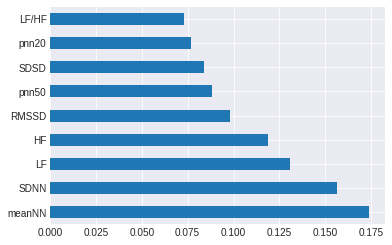

In [45]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)

print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

### **Decision Tree Classifier**

In [ ]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
dtc.score(X_test, y_test)

In [ ]:
y_pred = dtc.predict(X_test)
print(y_pred)
print(y_test)

print ("Accuracy is :", accuracy_score(y_test,y_pred)*100)

In [ ]:
results = confusion_matrix(y_test, y_pred) 
print ('Confusion Matrix :')
print(results) 

### **Linear SVC**

In [48]:
from sklearn.svm import LinearSVC

model = LinearSVC(loss='hinge', dual=True)
model.fit(X_train, y_train)
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
print("--------------------------------------------Training Insights-----------------------------------------------------------")
pred=model.predict(X_train)
print(classification_report(pred,y_train))
Accuracy= accuracy_score(pred,y_train)
print("------------------      Accuracy      --------- =",Accuracy)
print("CONFUSION MATRIX")
print(confusion_matrix(pred,y_train))
print("--------------------------------------------------------------------------------------------------------------------------")
print("--------------------------------------------Testing Insights---------------------------------------------------------------")
pred=model.predict(X_test)
print(classification_report(pred,y_test))
Accuracy= accuracy_score(pred,y_test)
print("------------------      Accuracy      --------- =",Accuracy)
print("CONFUSION MATRIX")
print(confusion_matrix(pred,y_test))

--------------------------------------------Training Insights-----------------------------------------------------------
              precision    recall  f1-score   support

          -1       0.20      1.00      0.33         2
           0       1.00      0.62      0.76        21

    accuracy                           0.65        23
   macro avg       0.60      0.81      0.55        23
weighted avg       0.93      0.65      0.73        23

------------------      Accuracy      --------- = 0.6521739130434783
CONFUSION MATRIX
[[ 2  0]
 [ 8 13]]
--------------------------------------------------------------------------------------------------------------------------
--------------------------------------------Testing Insights---------------------------------------------------------------
              precision    recall  f1-score   support

          -1       0.29      1.00      0.44         2
           0       1.00      0.44      0.62         9

    accuracy                        

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


### **Polynomial Kernel SVM**

In [49]:
from sklearn import svm
from sklearn.svm import LinearSVC
model = svm.SVC(kernel='poly', degree=1.2, gamma='auto', coef0=1, C=5)
model.fit(X_train, y_train)
print("--------------------------------------------Training Insights-----------------------------------------------------------")
pred=model.predict(X_train)
print(classification_report(pred,y_train))
Accuracy= accuracy_score(pred,y_train)
print("------------------      Accuracy      --------- =",Accuracy)
print("CONFUSION MATRIX")
print(confusion_matrix(pred,y_train))
print("--------------------------------------------------------------------------------------------------------------------------")
print("--------------------------------------------Testing Insights---------------------------------------------------------------")
pred=model.predict(X_test)
print(classification_report(pred,y_test))
Accuracy= accuracy_score(pred,y_test)
print("------------------      Accuracy      --------- =",Accuracy)
print("CONFUSION MATRIX")
print(confusion_matrix(pred,y_test))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


--------------------------------------------Training Insights-----------------------------------------------------------
              precision    recall  f1-score   support

          -1       1.00      0.91      0.95        11
           0       0.92      1.00      0.96        12

    accuracy                           0.96        23
   macro avg       0.96      0.95      0.96        23
weighted avg       0.96      0.96      0.96        23

------------------      Accuracy      --------- = 0.9565217391304348
CONFUSION MATRIX
[[10  1]
 [ 0 12]]
--------------------------------------------------------------------------------------------------------------------------
--------------------------------------------Testing Insights---------------------------------------------------------------
              precision    recall  f1-score   support

          -1       1.00      0.88      0.93         8
           0       0.75      1.00      0.86         3

    accuracy                        